In [195]:
%load_ext autoreload
%autoreload 2

# Imports
import pandas as pd

from scenario import LoanScenario

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
# Initial variables

# Constant
vars = ["L", "B"] # Variables to plot the output for

R = 2.56 # Yearly interest Rate (R) (in %)
# Set start year and end year
start_year = 2024
end_year = 2050

# Scenario 1
L0 = 10_000 # Start Loan (L) amount
B0 = 5_000 # Start (combined) Balance (B) (overall balance on on your bank accounts)
LC = 100 # Change of the loan in this period: how much you are adding/repaying per month

s1 = LoanScenario(L0=L0, B0=B0, LC=LC, R=R, start_year=start_year, end_year=end_year)


# Scenario 1
L0 = 6_000 # Start Loan (L) amount
B0 = 1_000 # Start (combined) Balance (B) (overall balance on on your bank accounts)
LC = 0 # Change of the loan in this period: how much you are adding/repaying per month

s2 = LoanScenario(L0=L0, B0=B0, LC=LC, R=R, start_year=start_year, end_year=end_year)

scenarios = {"s1": s1,"s2": s2}

In [197]:
# Simulate
for s in scenarios.values():
    s.calculate()

# Combine the scenarios into 1 dataframe
results = {v: pd.DataFrame() for v in vars}

for s_name ,s in scenarios.items():
    prefix = s_name

    for v in vars:
        results[v]["Date"] = s.df["Date"]
        results[v][f"{prefix}_{v}"] = s.df[v]

for v in vars:
    results[v].set_index("Date", inplace=True)

# Show dataframe
results["L"].head()

,s1_L,s2_L
Date,,
2024-01-01,10000.000000,6000.000000
2024-02-01,9921.262387,6012.886295
2024-03-01,9840.993445,6024.966270
2024-04-01,9761.914331,6037.906186
2024-05-01,9681.995293,6050.455145


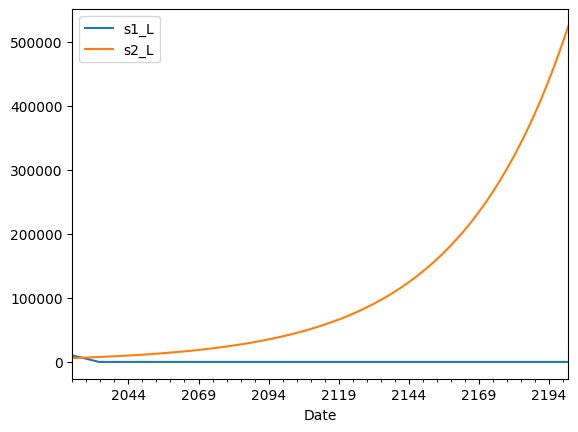

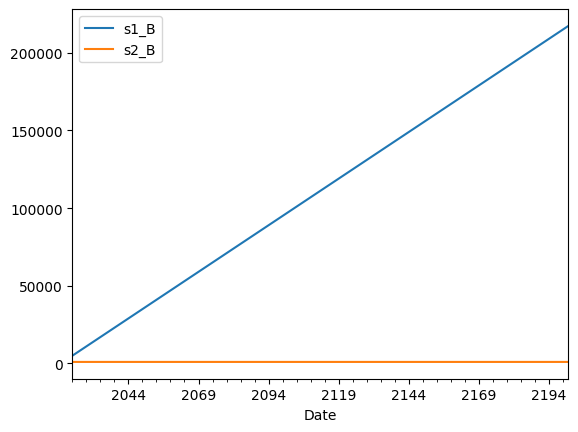

In [198]:
# Show output
for v in vars:
    results[v].plot.line()